In [13]:
# PART (a)
import json
from haralyzer import HarParser, HarPage

myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

for myhar_file in myhar_list:
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))
    
    page = har_parser.pages[0]
    
    print(f"File: {myhar_file} Page Load Time: {page.page_load_time} ms")


File: indiapost_config1.har Page Load Time: 203079.73800000036 ms
File: indiapost_config2.har Page Load Time: 27219.739000000118 ms
File: indiapost_config3.har Page Load Time: 27702.516000001197 ms
File: indiapost_default.har Page Load Time: 17036.615999997593 ms


In [14]:
# PART (b)
import json
from haralyzer import HarParser, HarPage

myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

for myhar_file in myhar_list:
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))

    total_requests_num = len(page.entries)
    total_data = sum(entry["response"]["content"].get("size",0) for entry in page.entries)
    
    print(f"File: {myhar_file} Total Requests: {total_requests_num} Total Data Transfer: {total_data} bytes")


File: indiapost_config1.har Total Requests: 103 Total Data Transfer: 7152110 bytes
File: indiapost_config2.har Total Requests: 103 Total Data Transfer: 7152110 bytes
File: indiapost_config3.har Total Requests: 103 Total Data Transfer: 7152110 bytes
File: indiapost_default.har Total Requests: 103 Total Data Transfer: 7152110 bytes


In [15]:
import json
from haralyzer import HarParser, HarPage

myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

mimeType_list = ['text/html','text/css','application/javascript','image/']
for myhar_file in myhar_list: 
    mimeType_num = {'text/html':0,'text/css':0,'application/javascript':0,'image/':0}
    print(f"File: {myhar_file}")
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))

    for mimeType in mimeType_list:
        mimeType_num[mimeType] = sum(1 for entry in page.entries if entry["response"]["content"].get("mimeType","").startswith(mimeType))
        print(f"     mimeType: {mimeType} count: {mimeType_num[mimeType]} bytes")


File: indiapost_config1.har
     mimeType: text/html count: 1 bytes
     mimeType: text/css count: 22 bytes
     mimeType: application/javascript count: 23 bytes
     mimeType: image/ count: 47 bytes
File: indiapost_config2.har
     mimeType: text/html count: 1 bytes
     mimeType: text/css count: 22 bytes
     mimeType: application/javascript count: 23 bytes
     mimeType: image/ count: 47 bytes
File: indiapost_config3.har
     mimeType: text/html count: 1 bytes
     mimeType: text/css count: 22 bytes
     mimeType: application/javascript count: 23 bytes
     mimeType: image/ count: 47 bytes
File: indiapost_default.har
     mimeType: text/html count: 1 bytes
     mimeType: text/css count: 22 bytes
     mimeType: application/javascript count: 23 bytes
     mimeType: image/ count: 47 bytes


In [17]:
# PART (c)
import json
import matplotlib.pyplot as plt
from haralyzer import HarParser, HarPage

# List of HAR files
myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

# Define different colors and labels for each network config
colors = ['b', 'g', 'r', 'm']  # Blue, Green, Red, Magenta
labels = ['Config 1', 'Config 2', 'Config 3', 'Default']

# Loop through each HAR file
for i, myhar_file in enumerate(myhar_list):
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))

    # Extract download times (ignoring -1 values)
    download_times = [entry["timings"].get("receive", -1) for entry in har_parser.pages[0].entries if entry["timings"].get("receive", -1) != -1]
    
    # Sort download times
    download_times.sort()
    total_downloads = len(download_times)
    
    # Initialize CDF list with first point at (0,0)
    cdf = [[0, 0]]
    
    # Construct CDF
    for j, time in enumerate(download_times, start=1):
        cdf.append([time, cdf[j-1][1] + 1])  # Use previous count +1
    
    # Normalize CDF values
    for j in range(len(cdf)):
        cdf[j][1] /= total_downloads  # Convert count to probability
    
    # Extract X (download times) and Y (CDF values)
    x_vals = [point[0] for point in cdf]  # Download times
    y_vals = [point[1] for point in cdf]  # Cumulative probabilities
    
    # Plot the CDF for each configuration
    plt.plot(x_vals, y_vals, linestyle='-', color=colors[i], label=labels[i])

# Formatting
plt.xlabel("Download Time (ms)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Download Times for Different Network Configurations")
plt.legend()
plt.grid(True)

# Show the final plot with all configurations
plt.show()


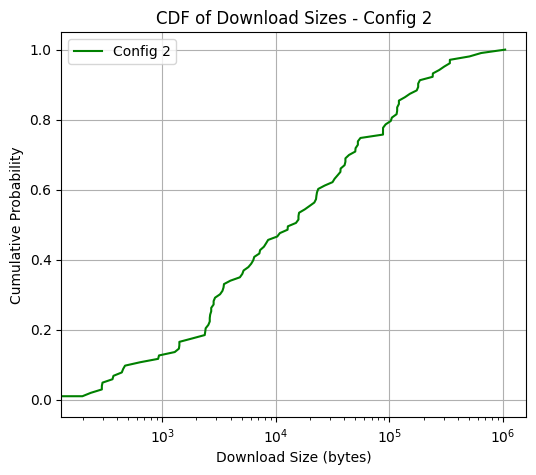

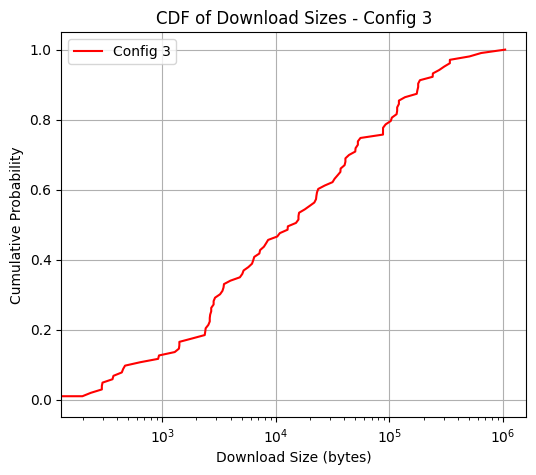

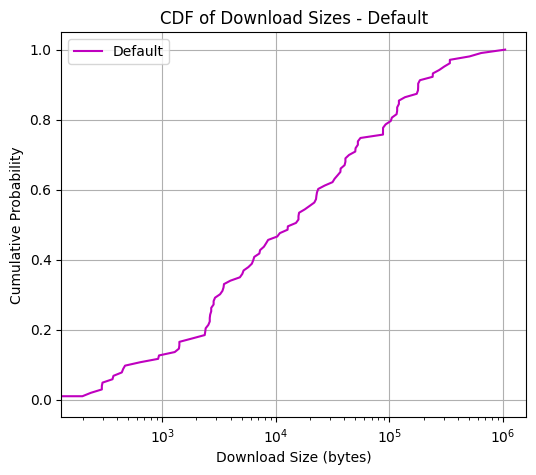

In [18]:
# PART (d)
import json
import matplotlib.pyplot as plt
from haralyzer import HarParser, HarPage

# List of HAR files
myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

# Define colors and labels for different network configurations
colors = ['b', 'g', 'r', 'm']
labels = ['Config 1', 'Config 2', 'Config 3', 'Default']

# Loop through each HAR file
for i, myhar_file in enumerate(myhar_list):
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))

    # Extract download sizes (ignoring -1 values)
    download_sizes = [entry["response"]["content"].get("size", -1) for entry in har_parser.pages[0].entries if entry["response"]["content"].get("size", -1) != -1]
    
    # Sort download sizes
    download_sizes.sort()
    total_downloads = len(download_sizes)
    
    # Initialize CDF list with first point at (0,0)
    cdf = [[0, 0]]

    # Construct CDF
    for j, size in enumerate(download_sizes, start=1):
        cdf.append([size, cdf[j-1][1] + 1])  # Use previous count +1
    
    # Normalize CDF values
    for j in range(len(cdf)):
        cdf[j][1] /= total_downloads  # Convert count to probability
    
    # Extract X (download sizes) and Y (CDF values)
    x_vals = [point[0] for point in cdf]
    y_vals = [point[1] for point in cdf]

    # **Create a new figure for each configuration**
    plt.figure(figsize=(6, 5))

    # Plot CDF
    plt.plot(x_vals, y_vals, linestyle='-', color=colors[i], label=labels[i])
    
    # Log Scales
    plt.xscale('log')

    # Formatting
    plt.xlabel("Download Size (bytes)")
    plt.ylabel("Cumulative Probability")
    plt.title(f"CDF of Download Sizes - {labels[i]}")
    plt.grid(True)
    plt.legend()

    # Show the plot for each configuration
    plt.show()


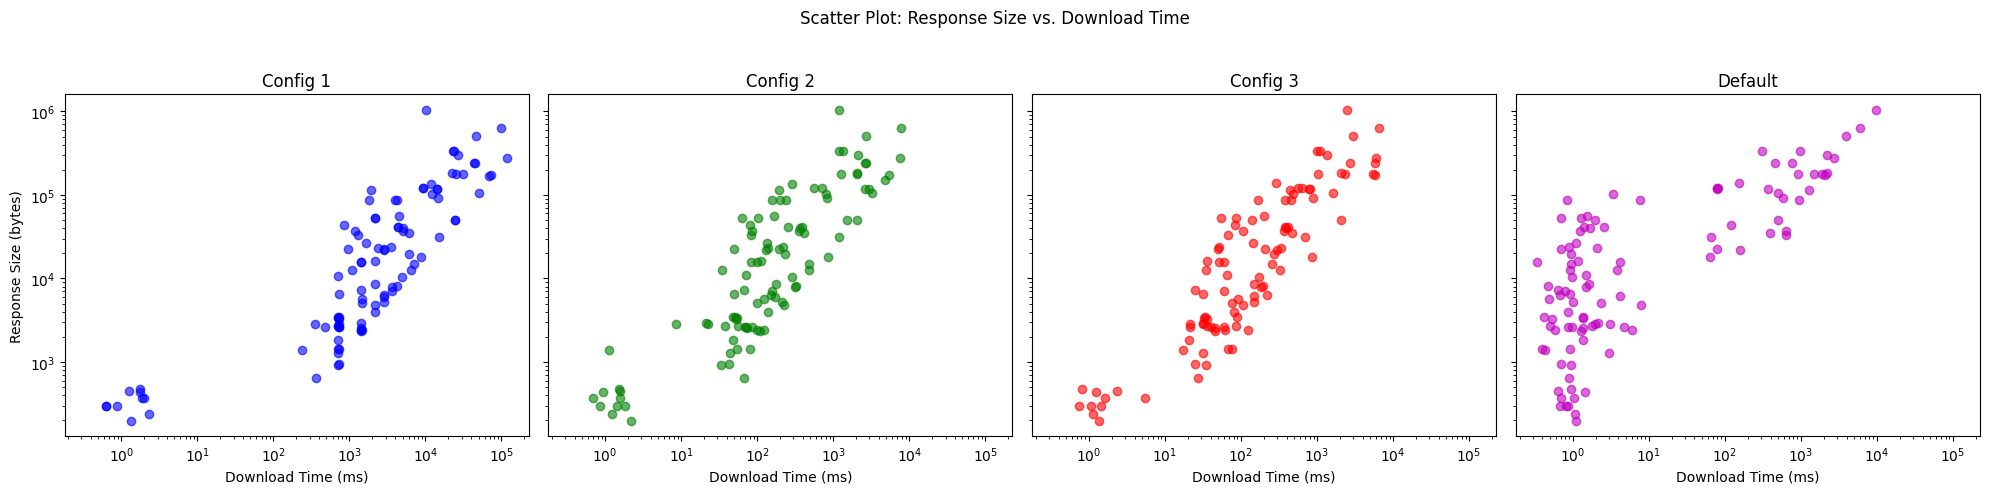

In [19]:
# PART (e)
import json
import matplotlib.pyplot as plt
from haralyzer import HarParser

# List of HAR files
myhar_list = ['indiapost_config1.har','indiapost_config2.har','indiapost_config3.har','indiapost_default.har']

# Define colors and labels for different network configurations
colors = ['b', 'g', 'r', 'm']
labels = ['Config 1', 'Config 2', 'Config 3', 'Default']

# Create a 1x4 subplot
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharex=True, sharey=True)

# Loop through each HAR file
for i, myhar_file in enumerate(myhar_list):
    with open(myhar_file, 'r', encoding='utf-8') as f:
        har_parser = HarParser(json.loads(f.read()))

    # Extract Response Sizes & Download Times
    response_sizes = []
    download_times = []

    for entry in har_parser.pages[0].entries:
        size = entry["response"]["content"].get("size", -1)
        time = entry["timings"].get("receive", -1)
        
        # Ignore invalid values
        if size > 0 and time > 0:
            response_sizes.append(size)  # X-axis: Response Size (Bytes)
            download_times.append(time)  # Y-axis: Download Time (ms)

    # Scatter Plot for each network configuration
    axes[i].scatter(download_times,response_sizes,  color=colors[i], alpha=0.6)
    axes[i].set_title(labels[i])
    axes[i].set_xlabel("Download Time (ms)")
    axes[i].set_xscale('log')
    axes[i].set_yscale('log')
    if i == 0:
        axes[i].set_ylabel("Response Size (bytes)")

# Adjust layout and show the plot
plt.suptitle("Scatter Plot: Response Size vs. Download Time")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
